<h1 style="color:#159364; font-family:verdana;"> <center>Abortion Opinions Survay Analysis</center> </h1>

# Data Description
This is a toy data set derived from the General Social Survey that I intend to use for several purposes. First, the battery of abortion items can serve as toy data to illustrate mixed effects modeling as equivalent to a one-parameter (Rasch) model. Second, I include some covariates to also do some basic regressions. I think abortion opinions are useful learning tools for statistical inference for college students. Third, there's a time-series component as well for understanding how abortion attitudes have changed over time. Data include all General Social Survey observations from 1972 to 2018 for these variables.

| Column | Description |
| --- | --- |
| Format | A data frame with 64,814 observations on the following 18 variables. |
| id | a unique respondent identifier |
| year | the survey year |
| age | the respondent's age in years |
| race | the respondent's race, as character variable |
| sex | the respondent's gender, as character variable |
| hispaniccat | the respondent's Hispanic ethnicity, as character variable |
| educ | how many years the respondent spent in school |
| partyid | the respondent's party identification, as character variable |
| relactiv | the self-reported religious activity of the respondent on a 1:11 scale
 |
| abany | a binary variable that equals 1 if the respondent thinks abortion should be legal for any reason. 0 indicates no support for abortion for any reason.
 |
| abdefect | a numeric vector that equals 1 if the respondent thinks abortion should be legal if there is a serious defect in the fetus. 0 indicates no support for abortion in this circumstance.
 |
| abnomore | a numeric vector that equals 1 if the respondent thinks abortion should be legal if a woman is pregnant but wants no more children. 0 indicates no support for abortion in this circumstance. |
| abhlth | a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant woman's health is in danger. 0 indicates no support for abortion in this circumstance. |
| abpoor | a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant woman is poor and cannot afford more children. 0 indicates no support for abortion in this circumstance.
 |
| abrape | a numeric vector that equals 1 if the respondent thinks abortion should be legal if the woman became pregnant because of a rape. 0 indicates no support for abortion in this circumstance.
 |
| absingle | a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant woman is single and does not want to marry the man who impregnated her. 0 indicates no support for abortion in this circumstance.
 |
| pid | partyid recoded so that 7 = NA |
| hispanic | a dummy variable that equals 1 if the respondent is any way Hispanic |


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/abortion-opinions-in-the-general-social-survey/gss_abortion.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/abortion-opinions-in-the-general-social-survey/gss_abortion.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Missing Values

In [3]:
df.isnull().sum()

Unnamed: 0         0
id                 0
year               0
age              228
race               0
sex                0
hispaniccat    38164
educ             177
partyid          418
relactiv       45581
abany          28020
abdefect       20662
abnomore       20742
abhlth         20454
abpoor         20791
abrape         20892
absingle       20794
pid             1490
hispanic       38164
dtype: int64

# Data Preprocessing

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['educ'].fillna(df['educ'].mode()[0], inplace=True)
df['partyid'].fillna(df['partyid'].mode()[0], inplace=True)
df['pid'].fillna(df['pid'].mode()[0], inplace=True)
df['relactiv'].fillna('Not applicable', inplace=True)
df['hispaniccat'].fillna('Not Hispanic', inplace=True)
df['hispanic'].fillna('Not Hispanic', inplace=True)
df[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']] = \
df[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']].fillna(0)

# Cleaned data overview

In [5]:
df.head()

,id,year,age,race,sex,hispaniccat,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic
0,1,1972,23.0,White,Female,Not Hispanic,16.0,"Ind,Near Dem",Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Not Hispanic
1,2,1972,70.0,White,Male,Not Hispanic,10.0,Not Str Democrat,Not applicable,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,Not Hispanic
2,3,1972,48.0,White,Female,Not Hispanic,12.0,Independent,Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,Not Hispanic
3,4,1972,27.0,White,Female,Not Hispanic,17.0,Not Str Democrat,Not applicable,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,Not Hispanic
4,5,1972,61.0,White,Female,Not Hispanic,12.0,Strong Democrat,Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Not Hispanic


# Data Statistical Summary

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,64814.0,1151.810211,828.030233,1.0,507.0,1029.5,1570.0,4510.0
year,64814.0,1994.939180,13.465368,1972.0,1984.0,1996.0,2006.0,2018.0
age,64814.0,46.091971,17.504275,18.0,32.0,44.0,59.0,89.0
educ,64814.0,12.867313,3.172300,0.0,12.0,12.0,15.0,20.0
abany,64814.0,0.235042,0.424028,0.0,0.0,0.0,0.0,1.0
abdefect,64814.0,0.542722,0.498175,0.0,0.0,1.0,1.0,1.0
abnomore,64814.0,0.303360,0.459713,0.0,0.0,0.0,1.0,1.0
abhlth,64814.0,0.613278,0.487003,0.0,0.0,1.0,1.0,1.0
abpoor,64814.0,0.320764,0.466774,0.0,0.0,0.0,1.0,1.0
abrape,64814.0,0.551517,0.497343,0.0,0.0,1.0,1.0,1.0


# Proportion of Respondents Who Support Abortion

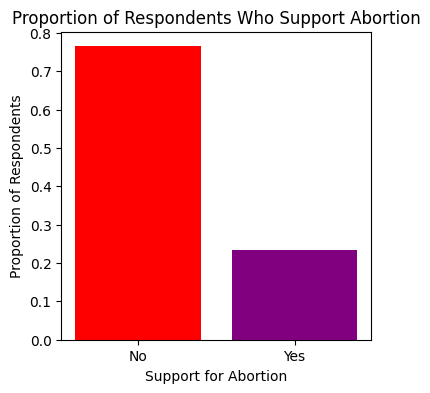

In [7]:
abany_counts = df["abany"].value_counts(normalize=True)
plt.figure(figsize=(4,4))
plt.bar(x=abany_counts.index, height=abany_counts.values, color=["red", "purple"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Proportion of Respondents Who Support Abortion")
plt.xlabel("Support for Abortion")
plt.ylabel("Proportion of Respondents")
plt.show()

# Distribution of Respondent Age

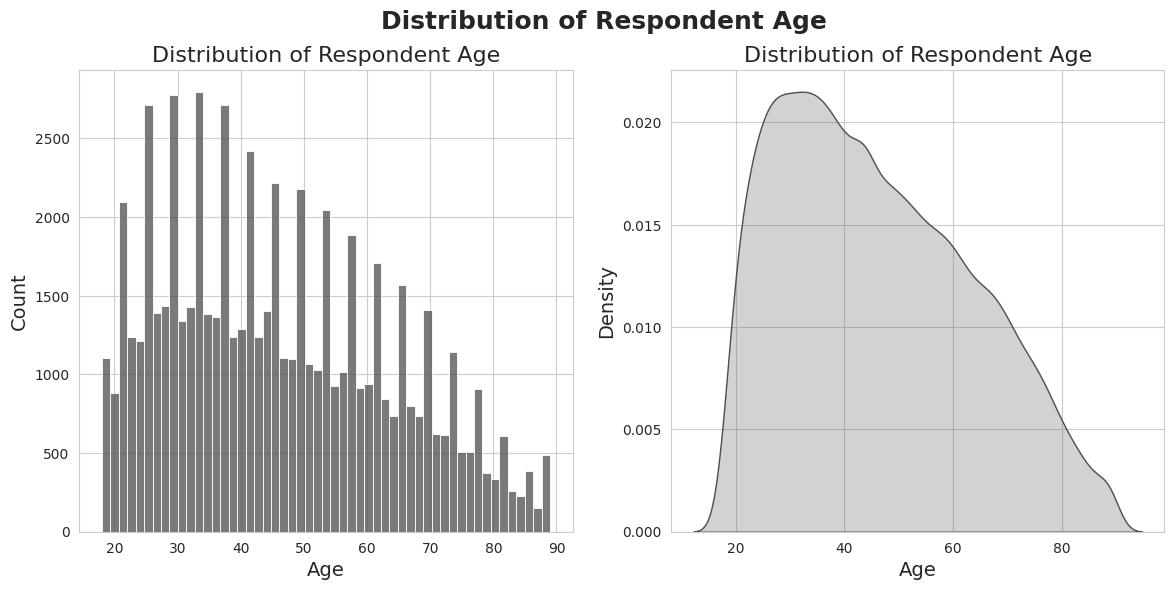

In [8]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='age', kde=False, ax=ax1, color='#4d4d4d')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Respondent Age', fontsize=16)
sns.kdeplot(data=df, x='age', fill=True, ax=ax2, color='#4d4d4d')
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution of Respondent Age', fontsize=16)
fig.suptitle('Distribution of Respondent Age', fontsize=18, fontweight='bold')
plt.show()

# Relationship between Age and Support for Abortion

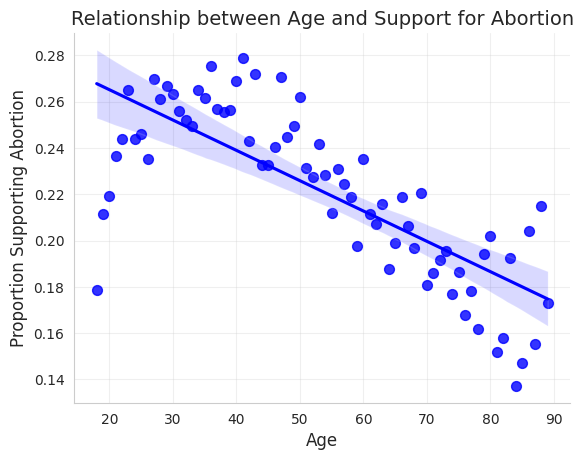

In [9]:
age_grouped = df.groupby('age')['abany'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Proportion Supporting Abortion', fontsize=12)
plt.title('Relationship between Age and Support for Abortion', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Proportion of Respondents Supporting Abortion over Time

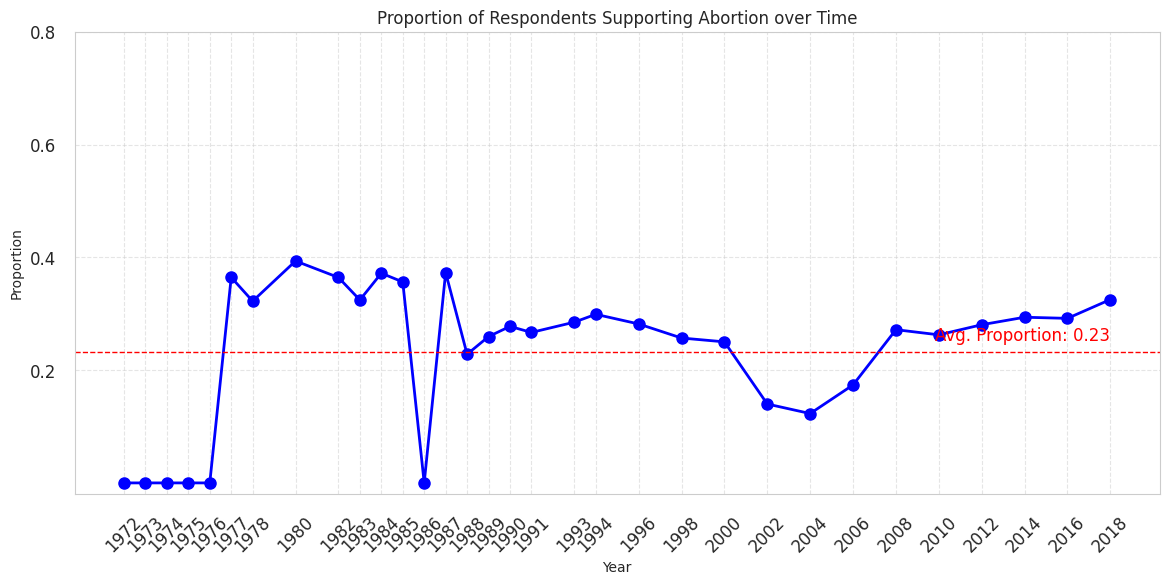

In [10]:
abortion_prop = df.groupby('year')['abany'].mean()
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(abortion_prop.index, abortion_prop.values, marker='o', markersize=8, linewidth=2, color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Respondents Supporting Abortion over Time')
ax.set_xticks(abortion_prop.index)
ax.tick_params(axis='x', which='major', labelsize=12, pad=10, rotation=45)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.tick_params(axis='y', which='major', labelsize=12, pad=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

avg_prop = abortion_prop.mean()
ax.axhline(avg_prop, linestyle='--', color='red', linewidth=1)
ax.text(abortion_prop.index[-1], avg_prop+0.02, f'Avg. Proportion: {avg_prop:.2f}', ha='right', fontsize=12, color='red')
plt.show()

# Support for Abortion by Party Identification

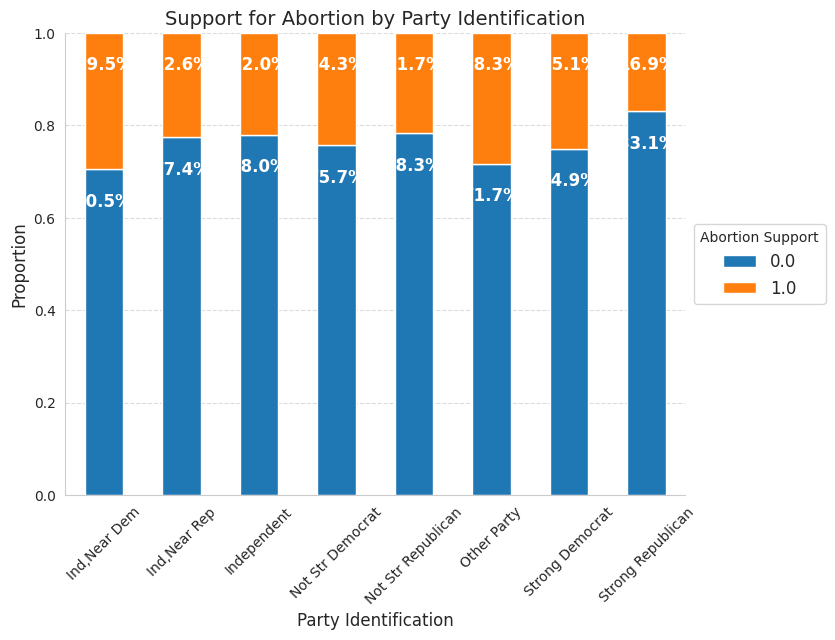

In [11]:
colors = ['#1f77b4', '#ff7f0e']
cross_tab = pd.crosstab(df['partyid'], df['abany'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Party Identification', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Support for Abortion by Party Identification', fontsize=14)
ax.legend(title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

# Relationship between education and support for abortion

/tmp/ipykernel_20/1521115920.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


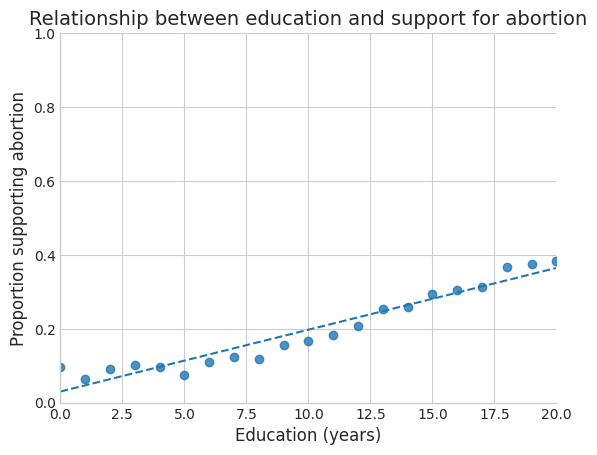

In [12]:
plt.style.use('seaborn-whitegrid')
colors = ['#1f77b4']
educ_abany_prop = df.groupby('educ')['abany'].mean()
plt.scatter(educ_abany_prop.index, educ_abany_prop.values, color=colors, alpha=0.8)
z = np.polyfit(educ_abany_prop.index, educ_abany_prop, 1)
p = np.poly1d(z)
plt.plot(educ_abany_prop.index, p(educ_abany_prop.index), color=colors[0], linestyle='--')
plt.xlabel('Education (years)', fontsize=12)
plt.ylabel('Proportion supporting abortion', fontsize=12)
plt.title('Relationship between education and support for abortion', fontsize=14)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Support for Abortion by Gender

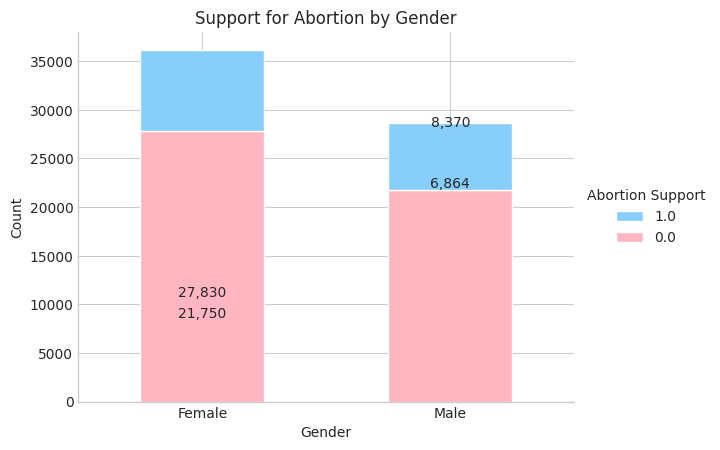

In [13]:
ct = pd.crosstab(df['sex'], df['abany'])
colors = ['#FFB6C1', '#87CEFA']
ax = ct.plot(kind='bar', stacked=True, color=colors)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Support for Abortion by Gender')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, row in ct.iterrows():
    for j, val in enumerate(row):
        if val > 0:
            ax.text(j, sum(row[:j+1])-0.9*val, f'{val:,}', ha='center', va='center')    # fix

                  
plt.show()

# Support for Abortion by Race/Ethnicity

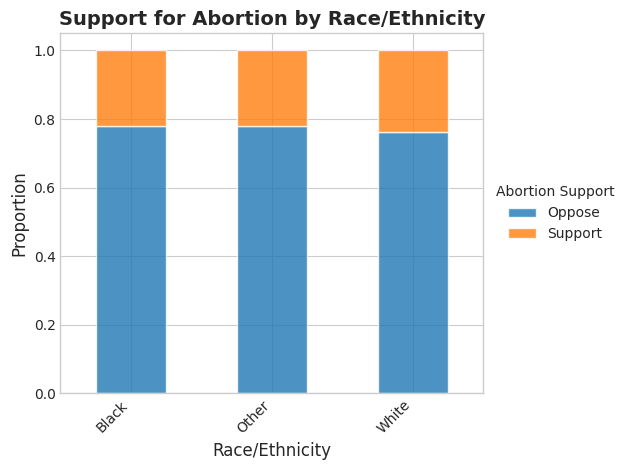

In [14]:
table = pd.crosstab(df.race, df.abany, normalize='index')
colors = ['#1f77b4', '#ff7f0e']
table.plot(kind='bar', stacked=True, color=colors, alpha=0.8)
plt.title('Support for Abortion by Race/Ethnicity', fontsize=14, fontweight='bold')
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Oppose', 'Support'], title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

# Proportion of Hispanic Respondents

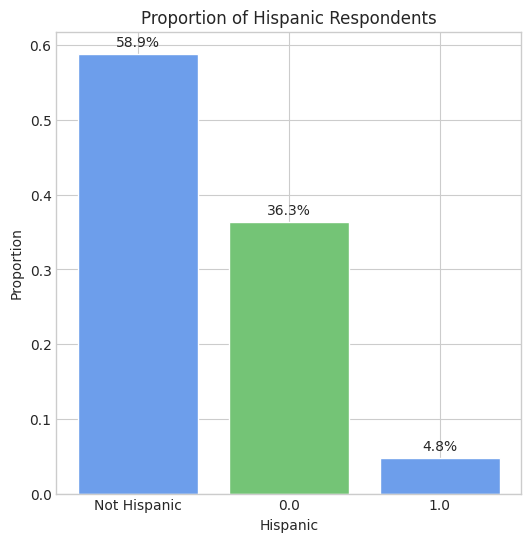

In [15]:
hispanic_prop = df['hispanic'].value_counts(normalize=True)
x_labels = [str(val) for val in hispanic_prop.index]
colors = ['#6d9eeb', '#74c476']
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x_labels, hispanic_prop.values, color=colors)
ax.set_title('Proportion of Hispanic Respondents')
ax.set_xlabel('Hispanic')
ax.set_ylabel('Proportion')
for i, v in enumerate(hispanic_prop.values):
    ax.text(i, v + 0.01, '{:.1%}'.format(v), ha='center')
plt.show()

# Support for Abortion by Level of Religious Activity

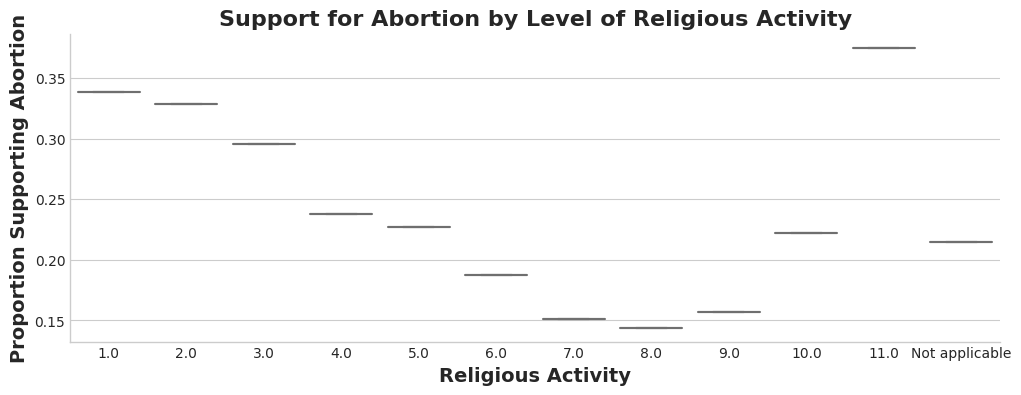

In [16]:
abortion_by_religactiv = df.groupby('relactiv')['abany'].mean().reset_index()
palette = sns.color_palette('pastel')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=abortion_by_religactiv, x='relactiv', y='abany', palette=palette)
ax.set_xlabel('Religious Activity', fontsize=14, fontweight='bold')
ax.set_ylabel('Proportion Supporting Abortion', fontsize=14, fontweight='bold')
ax.set_title('Support for Abortion by Level of Religious Activity', fontsize=16, fontweight='bold')
sns.despine()
plt.show()